#### Import required packages  


24-nov
    - t-SNE followed by spectral clustering



<a name='toc'></a>  TOC

* <a href='#t-sne'> t-SNE</a>
  - <a href='#end_of_file'> end of file</a>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time
import copy

from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.cluster import KMeans

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from __future__ import print_function

#### Read in cleaned  dataset from .csv file  

In [3]:
data_dir = '../data/'
data_file = 'mashable_clean_dataset_for_lab_03.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)

df_cluster = copy.deepcopy(df)


In [4]:
col_names = df_cluster.columns.values.tolist()

<a href='#toc'> Table of Contents</a>

<a name='t-sne'></a>
<font color="blue" size=3> t-SNE

In [5]:
# set required variables for model comparison

tsne_tbl = pd.DataFrame(columns = [
    'model_name',
    'perplexity',
    'kl_divergence',
    'process_time'])

i_index = []
i_index = 0

# preparation for cross validation and model comparison, each classifier is appended once model is fit

models = []

### t-SNE  


13875

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.033s...
[t-SNE] Computed neighbors for 13875 samples in 17.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] Computed conditional probabilities for sa

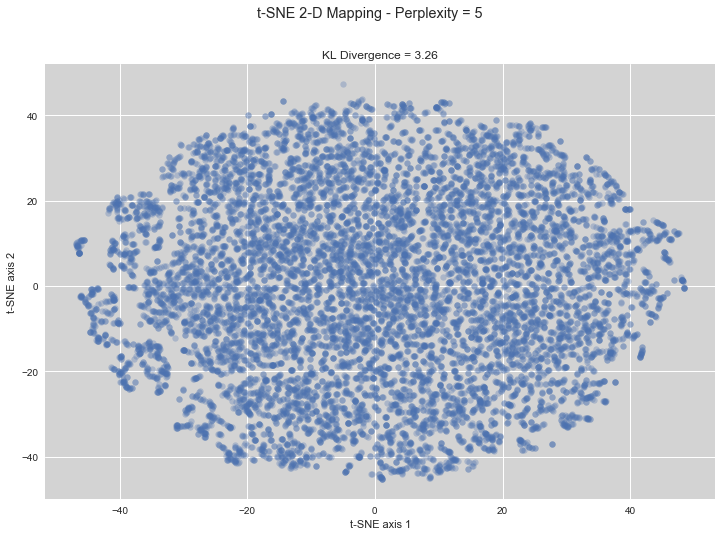

../data/t_sne_mapping_perplex_0005.csv
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.035s...
[t-SNE] Computed neighbors for 13875 samples in 17.000s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] Co

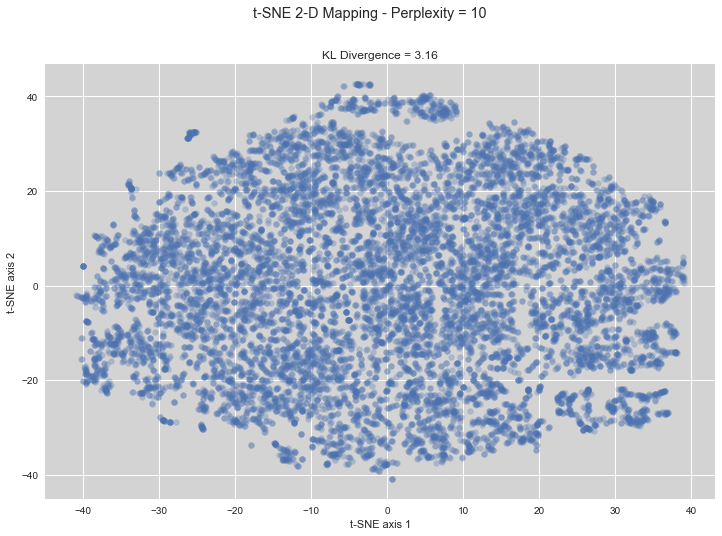

../data/t_sne_mapping_perplex_0010.csv
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.025s...
[t-SNE] Computed neighbors for 13875 samples in 19.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] Co

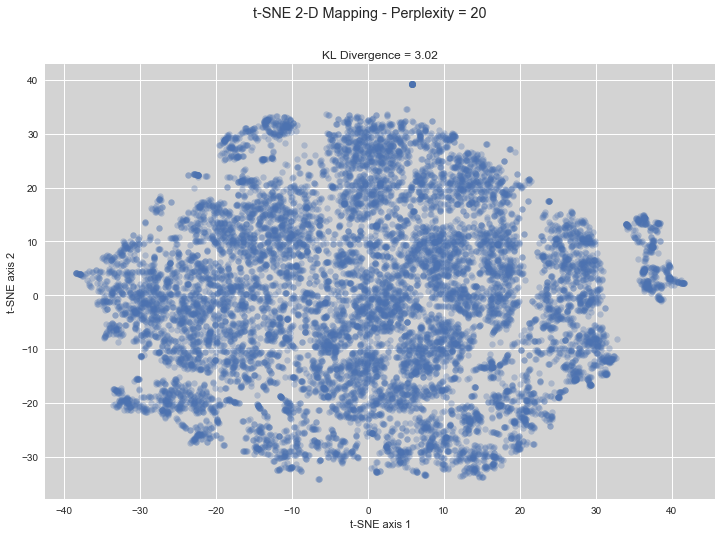

../data/t_sne_mapping_perplex_0020.csv
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.025s...
[t-SNE] Computed neighbors for 13875 samples in 18.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] C

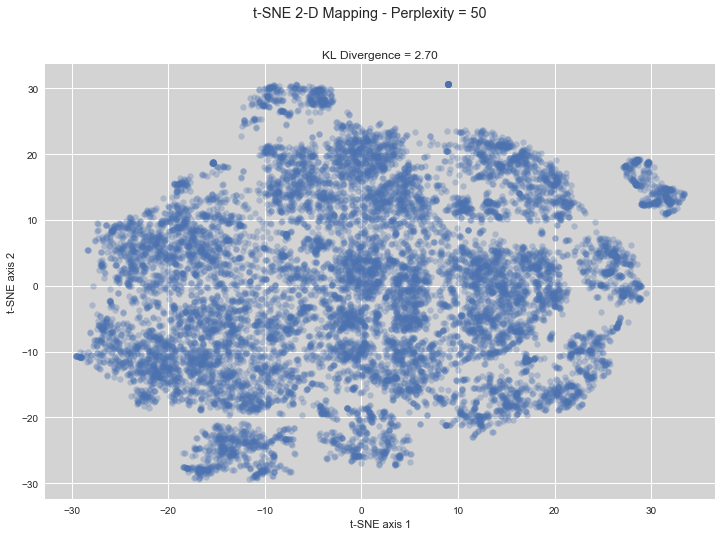

../data/t_sne_mapping_perplex_0050.csv
[t-SNE] Computing 226 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.023s...
[t-SNE] Computed neighbors for 13875 samples in 17.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] C

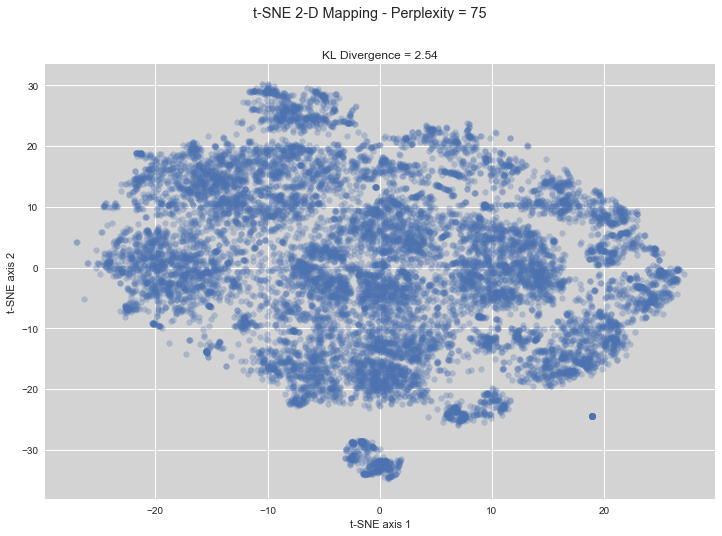

../data/t_sne_mapping_perplex_0075.csv
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.028s...
[t-SNE] Computed neighbors for 13875 samples in 19.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] C

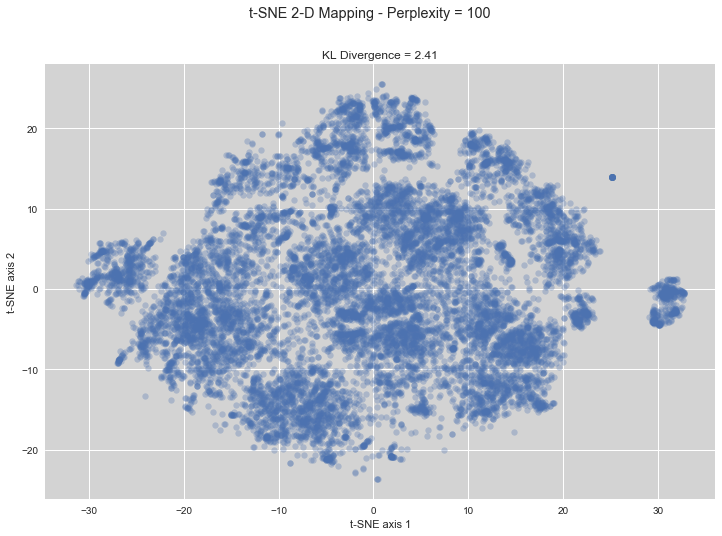

../data/t_sne_mapping_perplex_0100.csv
[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.024s...
[t-SNE] Computed neighbors for 13875 samples in 20.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] C

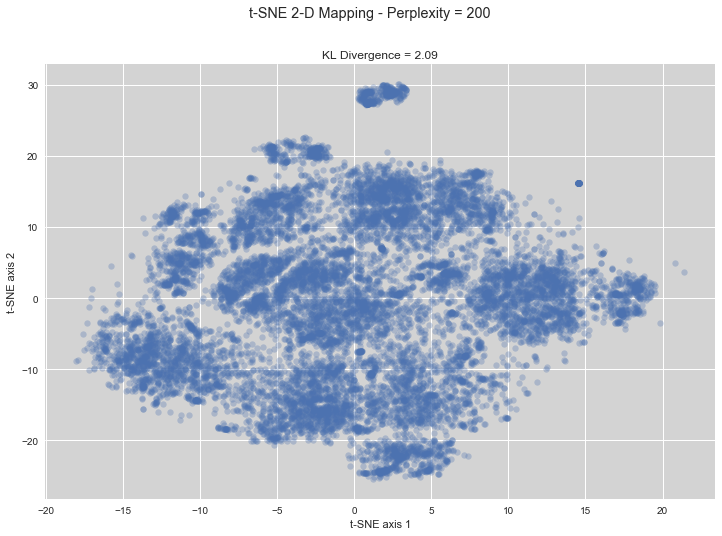

../data/t_sne_mapping_perplex_0200.csv
[t-SNE] Computing 1201 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.025s...
[t-SNE] Computed neighbors for 13875 samples in 23.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] 

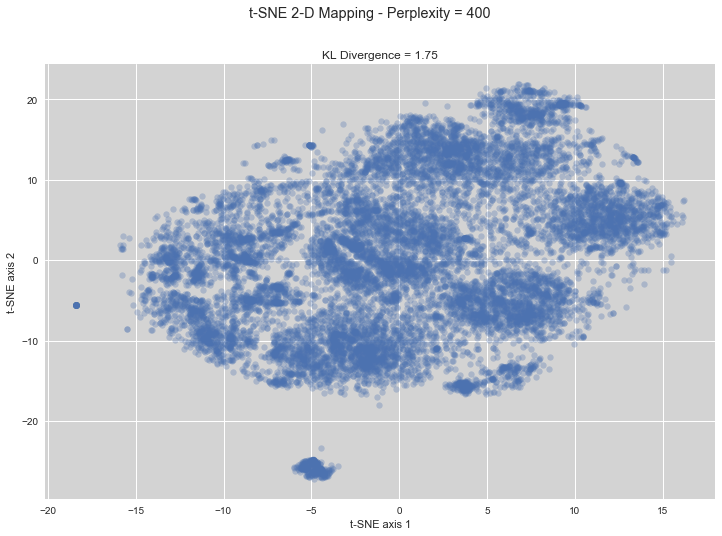

../data/t_sne_mapping_perplex_0400.csv
[t-SNE] Computing 3001 nearest neighbors...
[t-SNE] Indexed 13875 samples in 0.030s...
[t-SNE] Computed neighbors for 13875 samples in 32.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13875
[t-SNE] Computed conditional probabilities for sample 2000 / 13875
[t-SNE] Computed conditional probabilities for sample 3000 / 13875
[t-SNE] Computed conditional probabilities for sample 4000 / 13875
[t-SNE] Computed conditional probabilities for sample 5000 / 13875
[t-SNE] Computed conditional probabilities for sample 6000 / 13875
[t-SNE] Computed conditional probabilities for sample 7000 / 13875
[t-SNE] Computed conditional probabilities for sample 8000 / 13875
[t-SNE] Computed conditional probabilities for sample 9000 / 13875
[t-SNE] Computed conditional probabilities for sample 10000 / 13875
[t-SNE] Computed conditional probabilities for sample 11000 / 13875
[t-SNE] Computed conditional probabilities for sample 12000 / 13875
[t-SNE] 

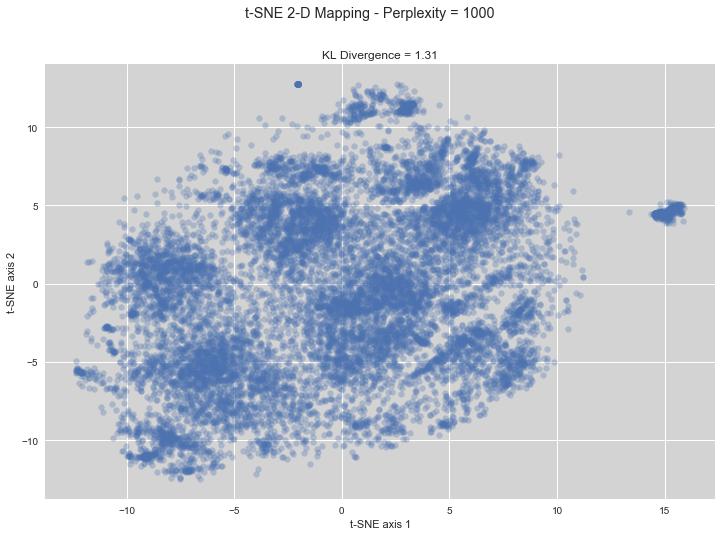

../data/t_sne_mapping_perplex_1000.csv


In [6]:
from sklearn.manifold import TSNE

X1 = df_cluster
X1 = X1.sample(frac = 0.35)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... save indexes from original dataframe for later re-joins
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

X1_index = list(X1.index.values)
len(X1_index)

df_out = pd.DataFrame(columns = ['x-tsne', 'y-tsne'])
df_out['sample_index'] = X1_index

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... t-sne for loop - evaluate range of perplexity values
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

for perplex in [5, 10, 20, 50, 75, 100, 200, 400, 1000] :

    i_index = i_index + 1
    tic = time.clock()

    tsne = TSNE(n_components = 2, verbose = 1, perplexity = perplex, n_iter = 500)

    tsne_results = tsne.fit_transform(X1)
    tsne_kl_diverge = tsne.kl_divergence_

    toc = time.clock()
    print (toc - tic)
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... - save statistics for model comparison
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    exe_time = '{0:.4f}'.format(toc-tic)
    
    raw_data = {
    'model_name' : 't-SNE - 2D',
    'perplexity' : perplex,
    'kl_divergence': tsne_kl_diverge,
    'process_time' : exe_time
    }

    df_tbl = pd.DataFrame(raw_data,
                            columns = ['model_name',
                                       'perplexity',
                                       'kl_divergence',
                                       'process_time'],
                            index = [i_index])
    
    tsne_tbl = tsne_tbl.append(df_tbl)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... - plot clusters
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    _ = plt.figure(figsize = (12, 8))
    _ = plt.subplot(111, facecolor = 'lightgrey')
    
    _ = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                 s = 40,
                 linewidths = 0,
                 alpha = 0.30)
    
    _ = plt.xlabel('t-SNE axis 1')
    _ = plt.ylabel('t-SNE axis 2')
        
    _ = plt.suptitle("t-SNE 2-D Mapping - Perplexity = %d" %perplex)
    _ = plt.title("KL Divergence = %.2f" %tsne_kl_diverge)
    _ = plt.grid(True)
    
    plt.savefig("perplex_%04d.png" %perplex)

    plt.show();
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... store in ../data/ directory
# ... write as .csv file for future recall
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

    df_out['x-tsne'] = tsne_results[:,0];
    df_out['y-tsne'] = tsne_results[:,1];

    data_dir = '../data/'
    data_file_base = "t_sne_mapping_perplex_"
    data_file_num = "%04d" %perplex
    data_file_ext = ".csv"
    file_2_write = data_dir + data_file_base + data_file_num + data_file_ext
    
    print(file_2_write)

    df_out.to_csv(file_2_write, index = False)
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... end of for loop on t-sne perplex
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



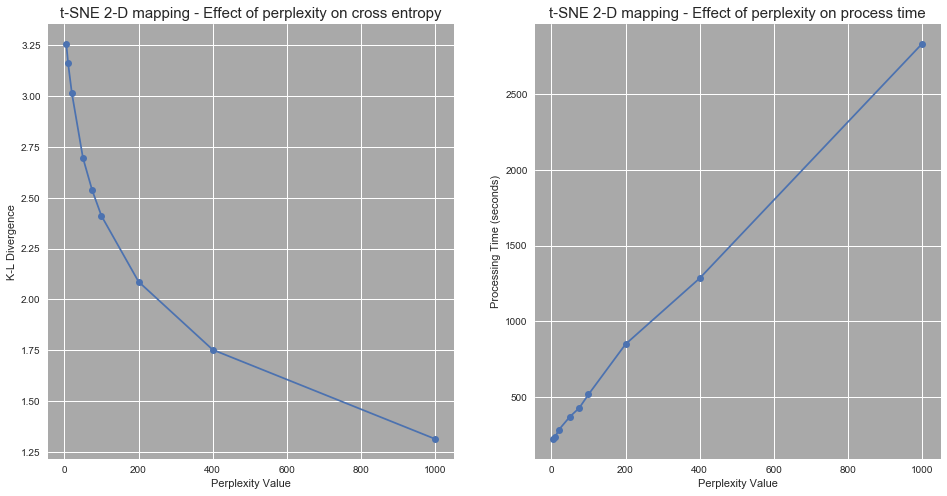

In [42]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... summary table from for loop results
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

tsne_tbl

tsne_tbl['process_time'] = pd.to_numeric(tsne_tbl['process_time'])
         
_ = plt.figure(figsize=(16, 8))

_ = plt.subplot(121, facecolor = 'darkgrey')
_ = plt.plot(tsne_tbl['perplexity'], tsne_tbl['kl_divergence'], marker = 'o')
_ = plt.xlabel('Perplexity Value')
_ = plt.ylabel('K-L Divergence')
_ = plt.title('t-SNE 2-D mapping - Effect of perplexity on cross entropy', fontsize = 15)

_ = plt.subplot(122, facecolor = 'darkgrey')
_ = plt.plot(tsne_tbl['perplexity'], tsne_tbl['process_time'], marker = 'o')
_ = plt.xlabel('Perplexity Value')
_ = plt.ylabel('Processing Time (seconds)')
_ = plt.title('t-SNE 2-D mapping - Effect of perplexity on process time', fontsize = 15)

plt.savefig("t_sne_divergence_process_time.png")
_ = plt.show();




<a href='#toc'> Table of Contents</a>

<a name='end_of_file'></a>
<font color="blue" size=3>  end of file